In [2]:
import pandas as pd
import numpy as np
data=np.array(pd.read_csv(r"C:\Users\anass\Desktop\React_App_HRV\Backend\ECG_FILES\ecg4.csv", header=None)[0])
sampling_rate=1000

C:\Users\anass\AppData\Local\Temp\ipykernel_6908\1841131528.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data=np.array(pd.read_csv(r"C:\Users\anass\Desktop\React_App_HRV\Backend\ECG_FILES\ecg4.csv", header=None)[0])


In [9]:
pd.read_csv(r"C:\Users\anass\Desktop\React_App_HRV\Backend\ECG_FILES\ecg4.csv")["ECG_Raw"].values

array([ 1.05678567,  1.0527943 ,  1.04381257, ..., -0.05229462,
       -0.05121812, -0.0502376 ])

In [1]:
import pandas as pd
import numpy as np
data=np.array(pd.read_csv(r"ecg1.csv", header=None)[0])
sampling_rate=1000
import wfdb as wf
ecg = wf.rdrecord('101', pn_dir='mitdb/1.0.0/')

sampling_rate=ecg.fs
data=ecg.p_signal[:,0]


In [2]:
def report_genaration(data, sampling_rate):
    import sys
    import numpy as np
    import matplotlib.pyplot as plt
    from io import StringIO
    import neurokit2 as nk 
    from datetime import datetime
    import pandas as pd
    from scipy.signal import resample
    import neurokit2 as nk
    from tensorflow.keras import models
    
    #total record duration in second
    totalRocordingDuration = len(data)/sampling_rate
    
    # total record but in form of a duration string hh:mm:ss
    total_seconds = int(totalRocordingDuration)
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    time_string = f"{hours:02}:{minutes:02}:{seconds:02}"
    
    # the srart of monitoring: string hh:mm:ss
    ecgStartMonitoring= datetime.now().date().strftime("%Y-%m-%d")+ " 00:00:00"
    
    #the end of monitoring: string hh:mm:ss
    ecgEndMonitoring=datetime.now().date().strftime("%Y-%m-%d")+ " " + time_string
    
    # processing ecg to extract information 
    ecgInfo, ecgPeaks= nk.ecg_process(data, sampling_rate=sampling_rate)
    
    #the value of min heart rate BPM
    minHr=ecgInfo['ECG_Rate'].min()
    
    
    # the instant in which the min value of heart rate accur 
    total_seconds = int(round(ecgInfo['ECG_Rate'].argmin()/sampling_rate))
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    time_string_min = f"{hours:02}:{minutes:02}:{seconds:02}"
    
    
    # the instant in which the max value of heart rate accur 
    total_seconds = int(round(ecgInfo['ECG_Rate'].argmax()/sampling_rate))
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60

    time_string_max = f"{hours:02}:{minutes:02}:{seconds:02}"

    
    #the value of max heart rate BPM
    maxHr=ecgInfo['ECG_Rate'].max()
    
    #the value of the mean heart rate BPM 
    meanHr= ecgInfo['ECG_Rate'].mean()
    
    #number of analysed beats 
    analysedBeats=len(ecgPeaks['ECG_R_Peaks'])
    
    # get the dictionary of the time domaine analysis
    hrv_time = nk.hrv_time(ecgInfo, sampling_rate=sampling_rate, show=False)
    hrv_time_dict=hrv_time.to_dict()
    
    #get the figure of RR_distribution
    def capture_plot(ecgInfo, sampling_rate=sampling_rate):
        old_stdout = sys.stdout
        sys.stdout = StringIO()
        try:
            nk.hrv_time(ecgInfo, sampling_rate=sampling_rate, show=True)

            fig = plt.gcf()
        finally:
            sys.stdout = old_stdout

        return fig

    rr_distibution_plot = capture_plot(ecgInfo)
    
    # get the dictionnary of HRV frequency domain analysis 
    hrv_lomb = nk.hrv_frequency(ecgInfo, sampling_rate=sampling_rate, show=False, psd_method="lomb")
    hrv_fr_dict=hrv_lomb.to_dict()
    
    # get the figure of NN spectrum
    def capture_NN_spec(ecgInfo, sampling_rate=sampling_rate):
        old_stdout = sys.stdout
        sys.stdout = StringIO()
        try:
            nk.hrv_frequency(ecgInfo, sampling_rate=sampling_rate, show=True, psd_method="lomb")

            fig = plt.gcf()
        finally:
            sys.stdout = old_stdout

        return fig
    
    nn_spectrum_plot = capture_NN_spec(ecgInfo, sampling_rate=sampling_rate)
    
     # get the dictionnary of HRV non linair analysis 
        
    nonlinearhrv = nk.hrv_nonlinear(ecgInfo, sampling_rate=sampling_rate, show=False)
    nonlinearhrv_dict= nonlinearhrv.to_dict()
    
    # get the figure of Pointcaré Plot
    
    def capture_pointcare_spec(ecgInfo, sampling_rate=sampling_rate):
        old_stdout = sys.stdout
        sys.stdout = StringIO()
        try:
            nk.hrv_nonlinear(ecgInfo, sampling_rate=sampling_rate, show=True)

            fig = plt.gcf()
        finally:
            sys.stdout = old_stdout

        return fig
    nn_pointcare_plot = capture_pointcare_spec(ecgInfo, sampling_rate=sampling_rate)
    
    
    return {"totalRocordingDuration":totalRocordingDuration,"totalDurationString": time_string, "ecgStartMonitoring":ecgStartMonitoring, 
            "ecgEndMonitoring":ecgEndMonitoring, "minHr":minHr, "time_string_min":time_string_min,"maxHr":maxHr, "time_string_max":time_string_max,
            "analysedBeats":analysedBeats, "hrv_time_dict":hrv_time_dict , "hrv_fr_dict": hrv_fr_dict, "nonlinearhrv_dict":nonlinearhrv_dict,
            "rr_distibution_plot":rr_distibution_plot,
            "nn_pointcare_plot":nn_pointcare_plot,
            "nn_spectrum_plot":nn_spectrum_plot } 

{'totalRocordingDuration': 300.0,
 'totalDurationString': '00:05:00',
 'ecgStartMonitoring': '2024-03-06 00:00:00',
 'ecgEndMonitoring': '2024-03-06 00:05:00',
 'minHr': 67.41573033707866,
 'time_string_min': '00:01:18',
 'maxHr': 72.99270072992701,
 'time_string_max': '00:01:12',
 'analysedBeats': 350,
 'hrv_time_dict': {'HRV_MeanNN': {0: 856.8424068767908},
  'HRV_SDNN': {0: 11.952772532002424},
  'HRV_SDANN1': {0: 0.18449868599320032},
  'HRV_SDNNI1': {0: 11.702432401010142},
  'HRV_SDANN2': {0: nan},
  'HRV_SDNNI2': {0: nan},
  'HRV_SDANN5': {0: nan},
  'HRV_SDNNI5': {0: nan},
  'HRV_RMSSD': {0: 13.096129989033217},
  'HRV_SDSD': {0: 13.114986601717076},
  'HRV_CVNN': {0: 0.013949791042171382},
  'HRV_CVSD': {0: 0.01528417581100928},
  'HRV_MedianNN': {0: 857.0},
  'HRV_MadNN': {0: 11.8608},
  'HRV_MCVNN': {0: 0.013839906651108517},
  'HRV_IQRNN': {0: 17.0},
  'HRV_SDRMSSD': {0: 0.9126950131078229},
  'HRV_Prc20NN': {0: 847.0},
  'HRV_Prc80NN': {0: 867.0},
  'HRV_pNN50': {0: 0.0},


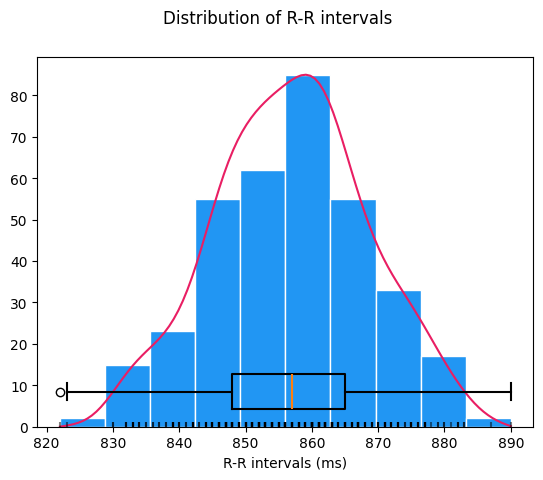

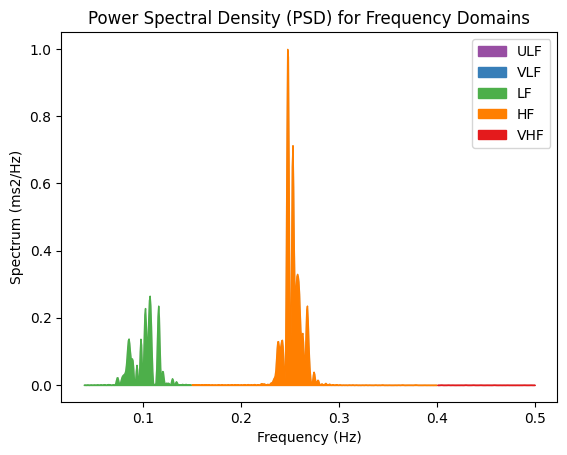

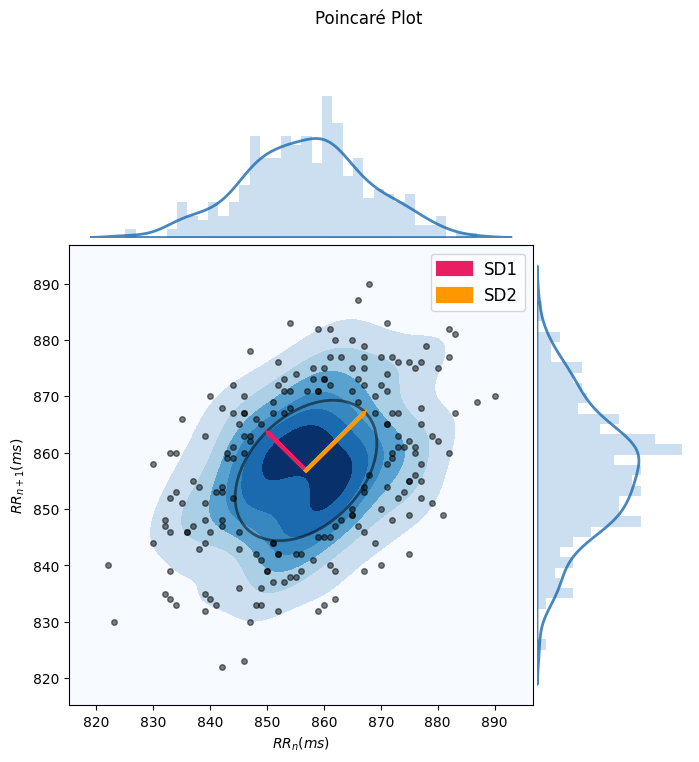

In [3]:
report_genaration(data, sampling_rate)

In [ ]:
def report_partTwo(data, sampling_rate):
    from scipy.signal import resample
    import neurokit2 as nk
    from tensorflow import keras
    from keras import models
    
    model=models.load_model('best_model.h5')
    signals, info = nk.ecg_process(data, sampling_rate=sampling_rate)
    cleaned_ecg = signals["ECG_Clean"]
    epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=512, show=False)

    X_test=pd.concat([pd.Series(resample(epochs[i]['Signal'], 187)) for i in epochs.keys()], axis=1).T
    X_test = np.expand_dims(X_test, 2)
    predY = model.predict(X_test)
    y_pred = np.argmax(predY,axis=1)
    case_duration={}
    Label={}
    j=0
    for i in epochs.keys():
        duration=(epochs[i]['Index'].iloc[-1]-epochs[i]['Index'].iloc[0])/sampling_rate
        case_duration[i]=duration
        Label[i]=y_pred[j]
        j=j+1
    return {"signalInformation": signals, "info": info, "epochs": epochs, "beatsDuration":case_duration, "beatsPrediction":Label}

In [5]:
#report_partTwo(data, sampling_rate)
import tensorflow as tf
print(tf.__version__)


2025-06-13 11:06:57.639820: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-13 11:06:57.931059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749805618.066061   11802 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749805618.101158   11802 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749805618.372406   11802 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

2.19.0
